# Определение перспективного тарифа для телеком компании
В ходе данного проекта мне предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В моём распоряжении данные 500 пользователей «Мегалайна» за 2018 год. 

__Описание тарифов:__
* Тариф __«Смарт»__
    * Ежемесячная плата: __550 рублей__
    * Включено __500 минут__ разговора, __50 сообщений__ и __15 Гб__ интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
    * минута разговора: __3 рубля__
    * сообщение: __3 рубля__
    * 1 Гб интернет-трафика: __200 рублей__
    

* Тариф __«Ультра»__
    * Ежемесячная плата: __1950 рублей__
    * Включено __3000 минут__ разговора, __1000 сообщений__ и __30 Гб__ интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
    * минута разговора: __1 рубль__
    * сообщение: __1 рубль__
    * 1 Гб интернет-трафика: __150 рублей__
    
## Цель исследования:
1. Описать поведение клиентов оператора, исходя из выборки. Определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение для данных параметров. Построить гистограммы. Описать распределения.
2. Проверить гипотезы: 
    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
3. Написать общий вывод о проведённом анализе

## Информация о входных данных
* Таблица __``users``__ *(информация о пользователях)*:
    * __``user_id``__ — уникальный идентификатор пользователя
    * __``first_name``__ — имя пользователя
    * __``last_name``__ — фамилия пользователя
    * __``age``__ — возраст пользователя (годы)
    * __``reg_date``__ — дата подключения тарифа (день, месяц, год)
    * __``churn_date``__ — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    * __``city``__ — город проживания пользователя
    * __``tariff``__ — название тарифного плана
    
    
* Таблица __``calls``__ *(информация о звонках)*:
    * __``id``__ — уникальный номер звонка
    * __``call_date``__ — дата звонка
    * __``duration``__ — длительность звонка в минутах
    * __``user_id``__ — идентификатор пользователя, сделавшего звонок


* Таблица __``messages``__ *(информация о сообщениях)*:
    * __``id``__ — уникальный номер сообщения
    * __``message_date``__ — дата сообщения
    * __``user_id``__ — идентификатор пользователя, отправившего сообщение


* Таблица __``internet``__ *(информация об интернет-сессиях)*:
    * __``id``__ — уникальный номер сессии
    * __``mb_used``__ — объём потраченного за сессию интернет-трафика (в мегабайтах)
    * __``session_date``__ — дата интернет-сессии
    * __``user_id``__ — идентификатор пользователя


* Таблица __``tariffs``__ *(информация о тарифах)*:
    * __``tariff_name``__ — название тарифа
    * __``rub_monthly_fee``__ — ежемесячная абонентская плата в рублях
    * __``minutes_included``__ — количество минут разговора в месяц, включённых в абонентскую плату
    * __``messages_included``__ — количество сообщений в месяц, включённых в абонентскую плату
    * __``mb_per_month_included``__ — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    * __``rub_per_minute``__ — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    * __``rub_per_message``__ — стоимость отправки сообщения сверх тарифного пакета
    * __``rub_per_gb``__ — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта

## Шаг 1. Изучение входных данных
Импортирую библиотеку __``Pandas``__ и с помощью метода __``.read_csv()``__ создаю 5 DataFrame с данными из различных баз данных. Новые датафреймы назову следующими именами:
1. __``data_calls``__ - информация о звонках
2. __``data_internet``__ - информация об интернет-сессиях
3. __``data_messages``__ - информация о сообщениях
4. __``data_tariffs``__ - информация о тарифах
5. __``data_users``__ - информация о пользователях

In [1]:
import pandas as pd   # Импортирую библиотеку Pandas
import matplotlib.pyplot as plt # Импортирую библиотеку визуализации
import numpy as np    # Импортирую библиотеку для математических вычислений
from scipy import stats as st # Испортирую библиотеку для высокоуровневых математических вычислений

ClrG = '\033[32m'                # Инициализирую переменную для вывода текста зелёным цветом 
ClrDef = '\033[0m'               # Инициализирую переменную для вывода текста с дефолтными настройками

# Создаю функцию для получения основной информации о датафрейме
def datainfo(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()

# Создаю DataFrame с именем 'data_calls'
data_calls = pd.read_csv('/datasets/calls.csv')
# Создаю DataFrame с именем 'data_internet'
data_internet = pd.read_csv('/datasets/internet.csv')
# Создаю DataFrame с именем 'data_messages'
data_messages = pd.read_csv('/datasets/messages.csv')
# Создаю DataFrame с именем 'data_tariffs'
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
# Создаю DataFrame с именем 'data_users'
data_users = pd.read_csv('/datasets/users.csv')

С помощью функции __``datainfo()``__ получаю основную информацию о таблицах

In [2]:
# Создаю список с названиями всех датафреймов
dataframe_list = [data_calls, data_internet, data_messages, data_tariffs, data_users]
for x in dataframe_list: # Применяю метод .info() ко всем датафреймам по очереди
    print(datainfo(x))   # Применяю метод .info()
    print('')            # Пустая строка для удобства чтения результатов вывода

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None



#### Получаю следующую структуру таблиц:
* __``data_calls``__
    * Количество столбцов: __4__
    * Количество строк: __202607__
    * Тип данных в столбцах: __float64(1), int64(1), object(2)__


* __``data_internet``__
    * Количество столбцов: __5__
    * Количество строк: __149396__
    * Тип данных в столбцах: __float64(1), int64(2), object(2)__


* __``data_messages``__
    * Количество столбцов: __3__
    * Количество строк: __123036__
    * Тип данных в столбцах: __int64(1), object(2)__    


* __``data_tariffs``__
    * Количество столбцов: __8__
    * Количество строк: __2__
    * Тип данных в столбцах: __int64(7), object(1)__   
    
    
* __``data_users``__
    * Количество столбцов: __8__
    * Количество строк: __500__
    * Тип данных в столбцах: __int64(2), object(6)__   

### Вывод
#### Проанализировав полученную информацию о таблицах, можно выделить следующие проблемы:
* Столбец __'churn_date'__ в таблице __``data_users``__ имеет пропущенные значения
* Столбец __'Unnamed:'__ в таблице __``data_internet``__ имеет некорректный вид

Для проведения дальнейшего анализа необходимо решить найденные проблемы и более детально изучить столбцы в данных таблицах.

## Шаг 2. Подготовка данных
### 2.1. Предобработка данных
Первым делом необходимо проанализировать все таблицы на наличие пропущенных значений. Для удобства и автоматизации процесса создам __цикл__, который проверит столбцы всех таблиц на наличие пропущенных значений с помощью метода __``.isnull().sum()``__.

In [3]:
# Проверяю все датафреймы из списка 'dataframe_list' на количество пропущенных значений
for x in dataframe_list:      # Создаю цикл для проверки 
    print('==============')   # Строка для удобства чтения результатов вывода
    print(ClrG, x.isnull().sum(), ClrDef) # Применяю метод .isnull().sum()
    print('==============')   # Строка для удобства чтения результатов вывода
    print()

 id           0
call_date    0
duration     0
user_id      0
dtype: int64 

 Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64 

 id              0
message_date    0
user_id         0
dtype: int64 

 messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64 

 user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64 



Пропущенные значения выявлены только в таблице __``data_users``__ в столбце __``churn_date``__. Количество пропусков __462__.

##### Избавление от пропущенных значений в столбце 'churn_date'
Исходя из описания входных данных, значения в данном столбце означают дату прекращения пользования тарифом, то есть если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Следовательно, пропущенные значения в данном столбце необходимо заменить на условный маркер для дальнейшего удобства в анализе. В качестве условного маркера можно использовать значение __0__.

In [4]:
data_users['churn_date'] = data_users['churn_date'].fillna(0)  # Заменяю пропуски на '0'
print('Количество пропущенных значений:', ClrG, data_users['churn_date'].isnull().sum()) # Кол-во пропусков

Количество пропущенных значений:  0


##### Избавление от некорректного столбца 'Unnamed:'  в таблице 'data_internet'
Данный столбец является некорректным и не несёт в себе никакой смысловой нагрузки, поэтому я принимаю решение удалить его из датафрейма с помощью функции __``del``__.

In [5]:
del data_internet['Unnamed: 0'] # Удаляю столбец 
data_internet.columns           # Вывожу список заголовков столбцов таблицы 'data_internet'

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

#### Предобработка таблицы 'data_calls'
Столбец __``call_date``__ имеет тип данных __object__, необходимо привести его к типу данных __datetime__ с помощью метода __``.to_datetime()``__.

In [6]:
# Преобразую столбец 'call_date' к типу данных datetime с помощью метода '.to_datetime()'
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls['call_date'].head(5)

0   2018-07-25
1   2018-08-17
2   2018-06-11
3   2018-09-21
4   2018-12-15
Name: call_date, dtype: datetime64[ns]

Столбец __``duration``__ - длительность звонка в минутах - имеет тип данных __float64__, что противоречит описанию входных данных о столбце, поэтому необходимо преобразовать данный столбец к типу данных __int__ - целое число и круглить в верхнюю сторону. 

In [7]:
data_calls['duration'].head(5) # Вывожу 5 строк столбца 'duration'

0     0.00
1     0.00
2     2.85
3    13.80
4     5.18
Name: duration, dtype: float64

Столбец содержит нулевые значения, чтобы определить что делать с нулевыми значениями, необходимо подробнее изучить значения в диапазоне от 0 до 1. Для этого воспользуюсь методом __``.query()``__.

In [8]:
print('Диапазон от 0 до 1 минуты:', ClrG, data_calls.query('duration > 0 and duration < 1')['duration'].count(), ClrDef)
print('Количество нулевых значений:', ClrG, data_calls.query('duration == 0')['duration'].count(), ClrDef)

Диапазон от 0 до 1 минуты:  8314 
Количество нулевых значений:  39613 


Таким образом известно, что имеется 8314 значений больше нуля и меньше 1, а также имеется 39613 нулевых значений. Исходя из полученной информации я могу сделать вывод о том, что нулевые значения соответствуют тем звонкам, когда абонент не ответил на звонок и соответственно длительность разговара составила 0 минут и 0 секунд, то есть нулевые значения в столбце __``duration``__ соответствуют исходящим непринятым звонкам. Опираясь на выдвигаемую мной гипотезу, можно сделать заключение о том, что исходящие звонки с длительностью 0 минут не расходуют пакет и за такие звонки не взимается плата, следовательно от нулевых значений можно избавиться путём удаления их из датафрейма, так как подобные записи не содержат в себе полезной смысловой нагрузки для проведения дальнейшего анализа и ответа на поставленные цели проекта.

Для округления значений в столбце __``duration``__ в большую сторону воспользуюсь библиотекой __``numpy``__ и встроенным в неё методом __``.ceil()``__.

In [9]:
import numpy as np     # Импортирую библиотеку 'numpy'

print('Строк до обработки:', ClrG, data_calls['duration'].count(), ClrDef) # Кол-во строк до обработки
data_calls['duration'] = np.ceil(data_calls['duration']) # Округляю значения в большую сторону
data_calls['duration'] = data_calls['duration'].astype('int') # Перевожу в целочисленные значения
data_calls = data_calls[~(data_calls[['duration']]==0).all(axis=1)] # Удаляю значения равные 0
print('Строк после обработки:', ClrG, data_calls['duration'].count(), ClrDef) # Кол-во строк после обработки
print('Количество нулевых значений:', ClrG, data_calls.query('duration == 0')['duration'].count(), ClrDef) # Кол-во нулей

Строк до обработки:  202607 
Строк после обработки:  162994 
Количество нулевых значений:  0 


Для дальнейшего анализа потребуется создать новый столбец __``call_month``__ в котором будет значение месяца в котором совершался звонок для каждой записи датафрейма __data_calls__. Для этого воспользуюсь методом __``.dt.month``__. Таким образом получу значение месяца в котором совершался звонок в числовом типе, после чего создаю функцию __change_call_month__, которая заменил числовое значение месяца на текстовое значение для удобства восприятия информации. *(Пример: 1 - Январь, 2 - Февраль)*

In [10]:
# Создаю функцию 'change_month_name' для изменения числового значения "Месяц" на текстовое название
def change_month_name(row):
    # Создаю словарь 'list_month' в котором каждому числовому значению Месяца соответствует текстовое значение
    list_month = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}
    month = row['month'] # Переменная 'month' равна значению из столбца 'month'
    if month == 1:              # Если 'call_month' равно 1, то
        month = list_month[1]   # Значение 'call_month' равно 'Январь'
        return month            # Вернуть новое значение переменной 'month'
    elif month == 2:            # Дальше всё аналогично
        month = list_month[2]  
        return month      
    elif month == 3:
        month = list_month[3]
        return month      
    elif month == 4:
        month = list_month[4]
        return month
    elif month == 5:
        month = list_month[5]
        return month  
    elif month == 6:
        month = list_month[6]
        return month
    elif month == 7:
        month = list_month[7]
        return month 
    elif month == 8:
        month = list_month[8]
        return month    
    elif month == 9:
        month = list_month[9]
        return month    
    elif month == 10:
        month = list_month[10]
        return month
    elif month == 11:
        month = list_month[11]
        return month
    elif month == 12:
        month = list_month[12]
        return month    
    else:
        return month

In [11]:
# Создаю столбец Месяц звонка
data_calls['month'] = data_calls['call_date'].dt.month 

# К датафрейму 'data_calls' применяю функцию 'change_month_name' с помощью метода '.apply()'
data_calls['month'] = data_calls.apply(change_month_name, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Предобработка таблицы 'data_internet'
Столбец __``session_date``__ имеет тип данных __object__, необходимо привести его к типу данных __datetime__ с помощью метода __``.to_datetime()``__.

In [12]:
# Преобразую столбец 'session_date' к типу данных datetime с помощью метода '.to_datetime()'
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['session_date'].head(5)

0   2018-11-25
1   2018-09-07
2   2018-06-25
3   2018-08-22
4   2018-09-24
Name: session_date, dtype: datetime64[ns]

Столбец __``mb_used``__ - объём потраченного за сессию интернет-трафика (в мегабайтах) - имеет тип данных __float64__, что противоречит описанию входных данных о столбце, поэтому необходимо преобразовать данный столбец к типу данных __int__ - целое число и круглить в верхнюю сторону. 

In [13]:
print('Диапазон от 0 до 1 mb:', ClrG, data_internet.query('mb_used > 0 and mb_used < 1')['mb_used'].count(), ClrDef)
print('Количество нулевых значений:', ClrG, data_internet.query('mb_used == 0')['mb_used'].count(), ClrDef)

Диапазон от 0 до 1 mb:  101 
Количество нулевых значений:  19598 


Таким образом известно, что имеется 101 значение больше нуля и меньше 1 mb, а также имеется 19598 нулевых значений. Исходя из полученной информации я могу сделать вывод о том, что нулевые значения появляются в том случае, когда абонент не использовал интернет трафик, либо размер трафика не превышал нескольких килобайт, следовательно такие значения не несут в себе полезной нагрузки для дальнейшего анализа и от них можно избавиться.

Для округления значений в столбце __``mb_used``__ в большую сторону воспользуюсь библиотекой __``numpy``__ и встроенным в неё методом __``.ceil()``__.

In [14]:
print('Строк до обработки:', ClrG, data_internet['mb_used'].count(), ClrDef) # Кол-во строк до обработки
data_internet['mb_used'] = np.ceil(data_internet['mb_used']) # Округляю значения в большую сторону
data_internet['mb_used'] = data_internet['mb_used'].astype('int') # Перевожу в целочисленные значения
data_internet = data_internet[~(data_internet[['mb_used']]==0).all(axis=1)] # Удаляю значения равные 0
print('Строк после обработки:', ClrG, data_internet['mb_used'].count(), ClrDef) # Кол-во строк после обработки
print('Количество нулевых значений:', ClrG, data_internet.query('mb_used == 0')['mb_used'].count(), ClrDef) # Кол-во нулей

Строк до обработки:  149396 
Строк после обработки:  129798 
Количество нулевых значений:  0 


Для дальнейшего анализа потребуется создать новый столбец __``month``__ в котором будет значение месяца в котором использовался интернет трафик для каждой записи датафрейма __data_internet__. Для этого воспользуюсь методом __``.dt.month``__. Таким образом получу значение месяца в котором использовался интернет трафик в числовом типе, после чего воспользуюсь созданной выше функцией __change_call_month__, которая заменит числовое значение месяца на текстовое значение для удобства восприятия информации. *(Пример: 1 - Январь, 2 - Февраль)*

In [15]:
# Создаю столбец Месяц использования интернет трафика
data_internet['month'] = data_internet['session_date'].dt.month 

# К датафрейму 'data_internet' применяю функцию 'change_month_name' с помощью метода '.apply()'
data_internet['month'] = data_internet.apply(change_month_name, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Предобработка таблицы 'data_messages'
Столбец __``message_date``__ имеет тип данных __object__, необходимо привести его к типу данных __datetime__ с помощью метода __``.to_datetime()``__.

In [16]:
# Преобразую столбец 'message_date' к типу данных datetime с помощью метода '.to_datetime()'
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['message_date'].head(5)

0   2018-06-27
1   2018-10-08
2   2018-08-04
3   2018-06-16
4   2018-12-05
Name: message_date, dtype: datetime64[ns]

Для дальнейшего анализа потребуется создать новый столбец __``month``__ в котором будет значение месяца в котором было отправлено смс сообщение для каждой записи датафрейма __data_messages__. Для этого воспользуюсь методом __``.dt.month``__. Таким образом получу значение месяца в котором было отправлено смс сообщение в числовом типе, после чего воспользуюсь созданной выше функцией __change_call_month__, которая заменит числовое значение месяца на текстовое значение для удобства восприятия информации. *(Пример: 1 - Январь, 2 - Февраль)*

In [17]:
# Создаю столбец Месяц отправки смс сообщения
data_messages['month'] = data_messages['message_date'].dt.month 

# К датафрейму 'data_messages' применяю функцию 'change_month_name' с помощью метода '.apply()'
data_messages['month'] = data_messages.apply(change_month_name, axis=1)

#### Предобработка таблицы 'data_users'
Столбец __``reg_date``__ имеет тип данных __object__, необходимо привести его к типу данных __datetime__ с помощью метода __``.to_datetime()``__.

In [18]:
# Преобразую столбец 'reg_date' к типу данных datetime с помощью метода '.to_datetime()'
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['reg_date'].head(5)

0   2018-05-25
1   2018-11-01
2   2018-06-17
3   2018-08-17
4   2018-05-14
Name: reg_date, dtype: datetime64[ns]

Столбец __``churn_date``__ имеет тип данных __object__, необходимо привести его к типу данных __datetime__ с помощью метода __``.to_datetime()``__. Так же значения равные __0__ в данном столбце будут автоматически заменены на условный маркер времени, то есть на значение __1970-01-01__. Данным маркером будут обозначены те строки, тариф на у которых ещё действовал на момент выгрузки данных, согласно описанию входных данных.

In [19]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['churn_date'].head(5)

0   1970-01-01
1   1970-01-01
2   1970-01-01
3   1970-01-01
4   1970-01-01
Name: churn_date, dtype: datetime64[ns]

### 2.2. Расчёт новых значений для каждого пользователя

В данном разделе необходимо расчитать для каждого клиента следующие параметры:
1. Количество сделанных звонков и израсходованных минут разговора по месяцам
1. Количество отправленных сообщений по месяцам
1. Объем израсходованного интернет-трафика по месяцам
1. Помесячная выручка с каждого пользователя


### 2.2.1 Количество сделанных звонков и израсходованных минут разговора по месяцам
Для подсчета количество сделанных звонков и израсходованных минут для каждого пользователя по месяцам, я воспользуюсь методом __``.groupby``__ для группировки таблицы по столбцам __user_id__ и __call_month__ и посчитаю сумму минут разговора с помощью метода __.sum()__. Далее создам временный датафрейм в котором посчитаю количество звонков по месяцам для каждого пользователя, после чего объединю два временных датафрейма и получу новый датафрейм __``calls_grouped``__ в котором будет содержаться информация об израсходованных минутах и количестве сделанных звонков для каждого пользователя по месяцам.

In [20]:
# Создаю df 'calls_grouped' в котором для каждого юзера посчитаю длительность звонков по месяцам
calls_grouped = data_calls.groupby(['user_id','month']).agg({'duration':'sum'}).reset_index()
# Переименую заголовки столбцов (для удобства)
calls_grouped.rename(columns={'duration': 'call_duration'}, inplace=True)
calls_grouped.head(5) # Вывод полученного df 

,user_id,month,call_duration
0,1000,Август,408
1,1000,Декабрь,333
2,1000,Июль,340
3,1000,Июнь,172
4,1000,Май,159


In [21]:
# Создаю df 'calls_grouped2' в котором для каждого юзера посчитаю количество звонков по месяцам
calls_grouped2 = data_calls.groupby(['user_id','month']).agg({'duration':'count'}).reset_index()
calls_grouped2.head(5) # Вывод полученного df 

,user_id,month,duration
0,1000,Август,42
1,1000,Декабрь,38
2,1000,Июль,41
3,1000,Июнь,28
4,1000,Май,17


In [22]:
# Объединяю два временных df в один постоянный
calls_grouped = calls_grouped.merge(calls_grouped2, on=['user_id', 'month'], how='left')
# Переименую заголовки столбцов (для удобства)
calls_grouped.rename(columns={'duration': 'call_count'}, inplace=True)
calls_grouped.head(5) # Вывод полученного df 

,user_id,month,call_duration,call_count
0,1000,Август,408,42
1,1000,Декабрь,333,38
2,1000,Июль,340,41
3,1000,Июнь,172,28
4,1000,Май,159,17


### 2.2.2 Количество отправленных сообщений по месяцам
Для подсчета количества отправленных сообщений для каждого пользователя по месяцам, я воспользуюсь методом __``.groupby``__ для группировки таблицы по столбцам __user_id__ и __month__ и посчитаю сумму отправленных сообщений с помощью метода __.count()__. Полученный датафрейм назову __``messages_grouped``__

In [23]:
# Создаю df 'messages_grouped' в котором для каждого юзера посчитаю кол-во сообщений по месяцам
messages_grouped = data_messages.groupby(['user_id','month']).agg({'id':'count'}).reset_index()

# Переименую заголовки столбцов (для удобства)
messages_grouped.rename(columns={'id': 'message_count'}, inplace=True)
messages_grouped.head(5) # Вывод полученного df

,user_id,month,message_count
0,1000,Август,81
1,1000,Декабрь,70
2,1000,Июль,75
3,1000,Июнь,60
4,1000,Май,22


### 2.2.3 Объем израсходованного интернет-трафика по месяцам
Для подсчета общего объёма израсходованного интернет-трафика для каждого пользователя по месяцам, я воспользуюсь методом __``.groupby``__ для группировки таблицы по столбцам __user_id__ и __month__ и посчитаю сумму израсходанного интернет-трафика в каждому месяце с помощью метода __.sum()__. Полученный датафрейм назову __``internet_grouped``__

In [24]:
# Создаю df 'internet_grouped' в котором для каждого юзера посчитаю объём трафика по месяцам
internet_grouped = data_internet.groupby(['user_id','month']).agg({'mb_used':'sum'}).reset_index()
# Переименую заголовки столбцов (для удобства)
internet_grouped.rename(columns={'mb_used': 'trafic_used'}, inplace=True)
internet_grouped.head(5) # Вывод полученного df

,user_id,month,trafic_used
0,1000,Август,14070
1,1000,Декабрь,9827
2,1000,Июль,14016
3,1000,Июнь,23257
4,1000,Май,2256


### 2.2.4 Помесячная выручка с каждого пользователя
Для удобства расчёта месячной выручки (ежемесячных расходов на связь) я объединю ранее созданные датафреймы __``calls_grouped, messages_grouped, internet_grouped``__ и __``data_users``__ в один df под названием __``full_user_data``__. Объединять таблицы буду с помощью метода __.merge()__.

In [25]:
full_user_data = calls_grouped.merge(messages_grouped,  how = 'outer', on = ['user_id', 'month']).merge(internet_grouped,  how = 'outer', on = ['user_id', 'month']).merge(data_users[['user_id', 'tariff']], how = 'left', on = 'user_id')
full_user_data = full_user_data.fillna(0) # заполняю пустые значения на 0
full_user_data.head(5) # вывожу полученный df на экран для визуальной оценки

,user_id,month,call_duration,call_count,message_count,trafic_used,tariff
0,1000,Август,408.0,42.0,81.0,14070.0,ultra
1,1000,Декабрь,333.0,38.0,70.0,9827.0,ultra
2,1000,Июль,340.0,41.0,75.0,14016.0,ultra
3,1000,Июнь,172.0,28.0,60.0,23257.0,ultra
4,1000,Май,159.0,17.0,22.0,2256.0,ultra


Далее создаю функцию __``set_total_pay``__, которая на вход принимает строку из __``full_user_data``__ и расчитывает какую сумму расходует каждый клиент взависимости от используемого тарифного плана. Для удобства, создаю словарь __``limit``__ в который записываю характеристики каждого тарифа. После чего применяю созданную функцию к датафрейму __``full_user_data``__.

In [26]:
# Создаю словарь для тарифных планов по следующему правилу:
# имя тарифа: 'минуты', 'смс', 'гб', 'цена за 1 минуту', 'цена за 1 смс', 'цена за 1 мб', 'цена тарифа'
limit = {'smart':[500, 50, 15000, 3, 3, 0.2, 550], 'ultra':[3000, 1000, 30000, 1, 1, 0.15, 1950]}

# Объявляю функцию 'set_total_pay' которая заполнит ежемесячную плату в столбце 'total_pay'
def set_total_pay(row):
    tarif = row['tariff']           # Название тарифного плана клиента
    duration = row['call_duration'] # Длительность разговоров за месяц
    message = row['message_count']  # Количество отправленных сообщений за месяц
    trafic = row['trafic_used']     # Объём использованного трафика за месяц
    cost = 0                        # Расходы за месяц
    
    if tarif == 'smart':
        if duration <= limit['smart'][0] and message <= limit['smart'][1] and trafic <= limit['smart'][2]:
            cost = limit['smart'][6]
            return cost
        elif duration > limit['smart'][0] and message <= limit['smart'][1] and trafic <= limit['smart'][2]:
            cost = ((duration - limit['smart'][0]) * limit['smart'][3]) + limit['smart'][6]
            return cost
        elif duration > limit['smart'][0] and message > limit['smart'][1] and trafic <= limit['smart'][2]:
            cost = ((duration - limit['smart'][0]) * limit['smart'][3]) + ((message - limit['smart'][1]) * limit['smart'][4]) + limit['smart'][6]
            return cost
        elif duration > limit['smart'][0] and message > limit['smart'][1] and trafic > limit['smart'][2]:
            cost = ((duration - limit['smart'][0]) * limit['smart'][3]) + ((message - limit['smart'][1]) * limit['smart'][4]) + ((trafic - limit['smart'][2]) * limit['smart'][5]) + limit['smart'][6]
            return cost
        elif duration <= limit['smart'][0] and message > limit['smart'][1] and trafic > limit['smart'][2]:
            cost = ((message - limit['smart'][1]) * limit['smart'][4]) + ((trafic - limit['smart'][2]) * limit['smart'][5]) + limit['smart'][6]
            return cost
        elif duration <= limit['smart'][0] and message > limit['smart'][1] and trafic <= limit['smart'][2]:
            cost = ((message - limit['smart'][1]) * limit['smart'][4]) + limit['smart'][6]
            return cost
        elif duration <= limit['smart'][0] and message <= limit['smart'][1] and trafic > limit['smart'][2]:
            cost = ((trafic - limit['smart'][2]) * limit['smart'][5]) + limit['smart'][6]
            return cost
        elif duration > limit['smart'][0] and message <= limit['smart'][1] and trafic > limit['smart'][2]:
            cost = ((duration - limit['smart'][0]) * limit['smart'][3]) + ((trafic - limit['smart'][2]) * limit['smart'][5]) + limit['smart'][6]
            return cost
    else:
        if duration <= limit['ultra'][0] and message <= limit['ultra'][1] and trafic <= limit['ultra'][2]:
            cost = limit['ultra'][6]
            return cost
        elif duration > limit['ultra'][0] and message <= limit['ultra'][1] and trafic <= limit['ultra'][2]:
            cost = ((duration - limit['ultra'][0]) * limit['ultra'][3]) + limit['ultra'][6]
            return cost
        elif duration > limit['ultra'][0] and message > limit['ultra'][1] and trafic <= limit['ultra'][2]:
            cost = ((duration - limit['ultra'][0]) * limit['ultra'][3]) + ((message - limit['ultra'][1]) * limit['ultra'][4]) + limit['ultra'][6]
            return cost
        elif duration > limit['ultra'][0] and message > limit['ultra'][1] and trafic > limit['ultra'][2]:
            cost = ((duration - limit['ultra'][0]) * limit['ultra'][3]) + ((message - limit['ultra'][1]) * limit['ultra'][4]) + ((trafic - limit['ultra'][2]) * limit['ultra'][5]) + limit['ultra'][6]
            return cost
        elif duration <= limit['ultra'][0] and message > limit['ultra'][1] and trafic > limit['ultra'][2]:
            cost = ((message - limit['ultra'][1]) * limit['ultra'][4]) + ((trafic - limit['ultra'][2]) * limit['ultra'][5]) + limit['ultra'][6]
            return cost
        elif duration <= limit['ultra'][0] and message > limit['ultra'][1] and trafic <= limit['ultra'][2]:
            cost = ((message - limit['ultra'][1]) * limit['ultra'][4]) + limit['ultra'][6]
            return cost
        elif duration <= limit['ultra'][0] and message <= limit['ultra'][1] and trafic > limit['ultra'][2]:
            cost = ((trafic - limit['ultra'][2]) * limit['ultra'][5]) + limit['ultra'][6]
            return cost
        elif duration > limit['ultra'][0] and message <= limit['ultra'][1] and trafic > limit['ultra'][2]:
            cost = ((duration - limit['ultra'][0]) * limit['ultra'][3]) + ((trafic - limit['ultra'][2]) * limit['ultra'][5]) + limit['ultra'][6]
            return cost

# К датафрейму 'full_user_data' применяю функцию 'set_total_pay' с помощью метода '.apply()'
full_user_data['total_pay'] = full_user_data.apply(set_total_pay, axis=1)

full_user_data.head(5) # вывожу таблицу на экран

,user_id,month,call_duration,call_count,message_count,trafic_used,tariff,total_pay
0,1000,Август,408.0,42.0,81.0,14070.0,ultra,1950.0
1,1000,Декабрь,333.0,38.0,70.0,9827.0,ultra,1950.0
2,1000,Июль,340.0,41.0,75.0,14016.0,ultra,1950.0
3,1000,Июнь,172.0,28.0,60.0,23257.0,ultra,1950.0
4,1000,Май,159.0,17.0,22.0,2256.0,ultra,1950.0


## Шаг 3. Анализ данных
Перед началом анализа необходимо сделать выборку только из тех строк, которые не содержат нулевых значений. Для этого создам новый dataframe с названием __``clear_user_data``__ и заполню его строками без нулевых значений в таких столбцах как __call_duration, message_count, trafic_used__.

In [27]:
# Создаю df 'clear_user_data' в котором не будет строк с нулевыми значениями
clear_user_data = full_user_data[full_user_data['call_duration'] != 0] # удаление нулевых строк в 'call_duration'
clear_user_data = clear_user_data[clear_user_data['message_count'] != 0] # удаление нулевых строк в 'message_count'
clear_user_data = clear_user_data[clear_user_data['trafic_used'] != 0] # удаление нулевых строк в 'trafic_used'
print('Было значений:', ClrG, len(full_user_data), ClrDef)
print('Стало значений:', ClrG, len(clear_user_data), ClrDef)
print('Удалено', ClrG, int(100 - (len(clear_user_data)/len(full_user_data)*100)), '%', ClrDef, 'значений')

data_city = data_users[['user_id', 'city']] # создаю df с user_id и названием города
# Добавляю столбец 'city' в таблицу 'clear_user_data'
clear_user_data = clear_user_data.merge(data_city, how = 'left', on = 'user_id')

Было значений:  3214 
Стало значений:  2660 
Удалено  17 %  значений


### 3.1 Анализ показателя "количество минут в месяц"
Для анализа данного показателя необходимо сформировать 2 новых датафрейма. 
* Первый - __``smart_data_calls``__ - он будет содержать информацию о клиентах пользующихся тарифным планом __"smart"__.
* Второй - __``ultra_data_calls``__ - он будет содержать информацию о клиентах пользующихся тарифным планом __"ultra"__.

Для начала расчитаю среднее количество использованных минут для каждого месяца для каждого тарифного плана по отдельности и среднее количество минут для каждого тарифа. Также посчитаю дисперсию и стандартное отклонение для каждого тарифного плана. После чего визуально сравню полученные результаты на столбчатой гистограмме, где тарифному плану __smart__ будет соответствовать фиолетовый цвет, а тарифному плану __ultra__ будет соответствовать синий цвет.

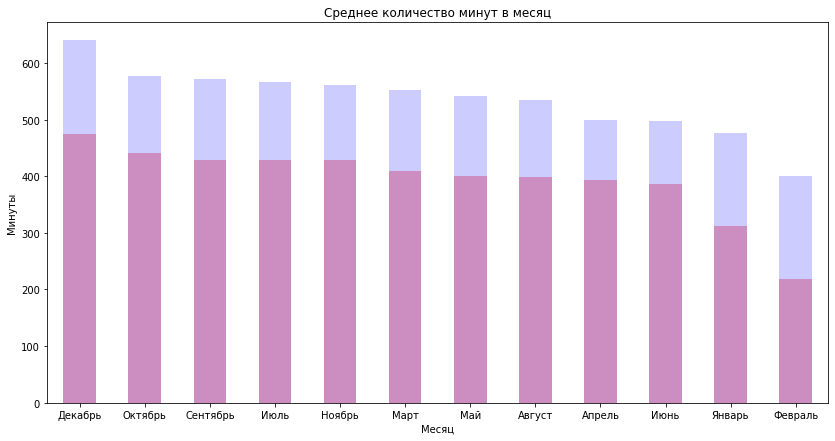

Среднее количество минут для тарифа "smart":  393 минут 
Среднее количество минут для тарифа "ultra":  534 минут 
Разница:  -141 минут 

Дисперсия тарифа "smart":  35030.70 
Дисперсия тарифа "ultra":  96254.90 

Стандартное отклонение для тарифа "smart":  187.16 
Стандартное отклонение для "ultra":  310.25 
Разница:  39.67 %


In [28]:
# Создаю df в котором будет среднее количество минут для каждого месяца для тарифа "smart"
smart_data_calls = clear_user_data.query('tariff == "smart"').groupby(['tariff','month']).agg({'call_duration':'mean'}).reset_index()

# Создаю df в котором будет среднее количество минут для каждого месяца для тарифа "ultra"
ultra_data_calls = clear_user_data.query('tariff == "ultra"').groupby(['tariff','month']).agg({'call_duration':'mean'}).reset_index()

# Рисую график для тарифа "smart" - фиолетовый цвет
ax = (
    smart_data_calls
    .sort_values(by='call_duration', ascending=False)
    .plot(y='call_duration', x='month', kind='bar', title='Среднее количество минут в месяц', figsize=(14, 7), alpha=0.3, color='r', grid=True, legend=False)
)
# Рисую график для тарифа "ultra" - синий цвет
(
    ultra_data_calls
    .sort_values(by='call_duration', ascending=False)
    .plot(y='call_duration', x='month', ax=ax, kind='bar', color='b', alpha=0.2, legend=False)
)
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('Минуты')
plt.show() # рисую гистограмму

smart_mean = int(smart_data_calls['call_duration'].mean()) # расчёт среднего количества минут для "smart"
ultra_mean = int(ultra_data_calls['call_duration'].mean()) # расчёт среднего количества минут для "ultra"

# Подсчёт средних значений для каждого тарифа
print('Среднее количество минут для тарифа "smart":', ClrG, smart_mean, 'минут', ClrDef)
print('Среднее количество минут для тарифа "ultra":', ClrG, ultra_mean, 'минут', ClrDef)
print('Разница:', ClrG, smart_mean - ultra_mean, 'минут', ClrDef)
print()

# Расчёт дисперсии для тарифа "smart"
smart = clear_user_data.query('tariff == "smart"')['call_duration'] # df с тарифом "smart"
smart_var = np.var(smart, ddof=1)  # расчёт дисперсии
print('Дисперсия тарифа "smart":', ClrG, '{:.2f}'.format(smart_var), ClrDef)

# Расчёт дисперсии для тарифа "ultra"
ultra = clear_user_data.query('tariff == "ultra"')['call_duration'] # df с тарифом "ultra"
ultra_var = np.var(ultra, ddof=1) # расчёт дисперсии
print('Дисперсия тарифа "ultra":', ClrG, '{:.2f}'.format(ultra_var), ClrDef)
print('')

# Расчёт стандартного отклонения для тарифа "smart"
smart_std = np.std(smart, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для тарифа "smart":', ClrG, '{:.2f}'.format(smart_std), ClrDef)

# Расчёт стандартного отклонения для тарифа "ultra"
ultra_std = np.std(ultra, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для "ultra":', ClrG, '{:.2f}'.format(ultra_std), ClrDef)

print('Разница:', ClrG, '{:.2f}'.format(100 - (smart_std / ultra_std * 100)), '%')

Проанализировав полученные результаты, следует отметить следующие важные особенности:
* Количество израсходованных минут у тарифа __ultra__ в каждом месяце больше чем у тарифа __smart__
* Среднее количество израсходованных минут у тарифа __ultra__ на __141 минуту больше__ чем у у тарифа __smart__
* Стандартное отклонения для тарифа __ultra__ на __39% больше__ чем для тарифа __smart__
* Больше всего минут для обоих тарифов было израсходовано в __декабре__, а меньше всего в __феврале__ 

Данные показатели говорят о том, что пользователи с тарифом __ultra__ расходуют в среднем на __26% минут больше__, чем пользователи с тарифом __smart__.

### 3.2 Анализ показателя "количество сообщений в месяц"
Для анализа данного показателя необходимо сформировать 2 новых датафрейма. 
* Первый - __``smart_data_messages``__ - он будет содержать информацию о клиентах пользующихся тарифным планом __"smart"__.
* Второй - __``ultra_data_messages``__ - он будет содержать информацию о клиентах пользующихся тарифным планом __"ultra"__.

Для начала расчитаю среднее количество отправленных сообщений в каждом месяце для каждого тарифного плана и среднее количество отправленных смс для каждого тарифа. Также посчитаю дисперсию и стандартное отклонение для каждого тарифного плана. После чего визуально сравню полученные результаты на столбчатой гистограмме, где тарифному плану __smart__ будет соответствовать __фиолетовый цвет__, а тарифному плану __ultra__ будет соответствовать __синий цвет__.

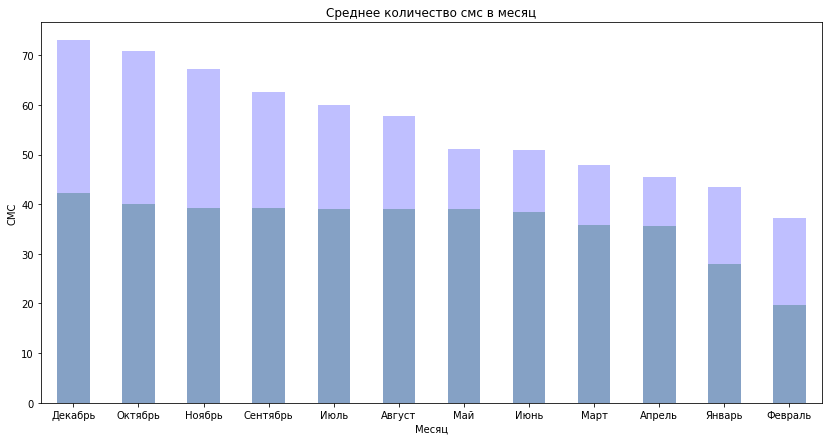

Среднее количество смс для тарифа "smart":  36 смс 
Среднее количество смс для тарифа "ultra":  55 смс 
Разница:  -19 смс 

Дисперсия тарифа "smart":  719.08 
Дисперсия тарифа "ultra":  1981.75 

Стандартное отклонение для тарифа "smart":  26.82 
Стандартное отклонение для "ultra":  44.52 
Разница:  39.76 %


In [29]:
# Создаю df в котором будет среднее количество смс для каждого месяца для тарифа "smart"
smart_data_messages = clear_user_data.query('tariff == "smart"').groupby(['tariff','month']).agg({'message_count':'mean'}).reset_index()

# Создаю df в котором будет среднее количество смс для каждого месяца для тарифа "ultra"
ultra_data_messages = clear_user_data.query('tariff == "ultra"').groupby(['tariff','month']).agg({'message_count':'mean'}).reset_index()

# Рисую график для тарифа "smart" - фиолетовый цвет
ax = (
    smart_data_messages
    .sort_values(by='message_count', ascending=False)
    .plot(y='message_count', x='month', kind='bar', title='Среднее количество смс в месяц', figsize=(14, 7), alpha=0.3, color='green', grid=True, legend=False)
)
# Рисую график для тарифа "ultra" - синий цвет
(
    ultra_data_messages
    .sort_values(by='message_count', ascending=False)
    .plot(y='message_count', x='month', ax=ax, kind='bar', color='blue', alpha=0.25, legend=False)
)
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('СМС')
plt.show() # рисую гистограмму

smart_mean = int(smart_data_messages['message_count'].mean()) # расчёт среднего количества смс для "smart"
ultra_mean = int(ultra_data_messages['message_count'].mean()) # расчёт среднего количества смс для "ultra"

# Подсчёт средних значений для каждого тарифа
print('Среднее количество смс для тарифа "smart":', ClrG, smart_mean, 'смс', ClrDef)
print('Среднее количество смс для тарифа "ultra":', ClrG, ultra_mean, 'смс', ClrDef)
print('Разница:', ClrG, smart_mean - ultra_mean, 'смс', ClrDef)
print()

# Расчёт дисперсии для тарифа "smart"
smart = clear_user_data.query('tariff == "smart"')['message_count'] # df с тарифом "smart"
smart_var = np.var(smart, ddof=1)  # расчёт дисперсии
print('Дисперсия тарифа "smart":', ClrG, '{:.2f}'.format(smart_var), ClrDef)

# Расчёт дисперсии для тарифа "ultra"
ultra = clear_user_data.query('tariff == "ultra"')['message_count'] # df с тарифом "ultra"
ultra_var = np.var(ultra, ddof=1) # расчёт дисперсии
print('Дисперсия тарифа "ultra":', ClrG, '{:.2f}'.format(ultra_var), ClrDef)
print('')

# Расчёт стандартного отклонения для тарифа "smart"
smart_std = np.std(smart, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для тарифа "smart":', ClrG, '{:.2f}'.format(smart_std), ClrDef)

# Расчёт стандартного отклонения для тарифа "ultra"
ultra_std = np.std(ultra, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для "ultra":', ClrG, '{:.2f}'.format(ultra_std), ClrDef)

print('Разница:', ClrG, '{:.2f}'.format(100 - (smart_std / ultra_std * 100)), '%')

Проанализировав полученные результаты, следует отметить следующие важные особенности:
* Количество отправленных смс для тарифа __ultra__ в каждом месяце больше чем для тарифа __smart__
* Среднее количество отправленных смс в тарифе __ultra__ на __19 смс больше__ чем в тарифе __smart__
* Стандартное отклонения для тарифа __ultra__ почти на __40% больше__ чем для тарифа __smart__
* Больше всего минут для обоих тарифов было израсходовано в __декабре__, а меньше всего в __феврале__ 

Данные показатели говорят о том, что пользователи с тарифом __ultra__ расходуют в среднем на __34% больше смс сообщений__ , чем пользователи с тарифом __smart__.

### 3.3 Анализ показателя "объём интернет-трафика в месяц"
Для анализа данного показателя необходимо сформировать 2 новых датафрейма. 
* Первый - __``smart_data_internet``__ - он будет содержать информацию о клиентах пользующихся тарифным планом __"smart"__.
* Второй - __``ultra_data_internet``__ - он будет содержать информацию о клиентах пользующихся тарифным планом __"ultra"__.

Для начала расчитаю среднее количество использованного интернет-трафика в каждом месяце для каждого тарифного плана и среднее количество использованного интернет-трафика для каждого тарифа. Также посчитаю дисперсию и стандартное отклонение для каждого тарифного плана. После чего визуально сравню полученные результаты на столбчатой гистограмме, где тарифному плану __smart__ будет соответствовать __зелёный цвет__, а тарифному плану __ultra__ будет соответствовать __оранжевый цвет__.

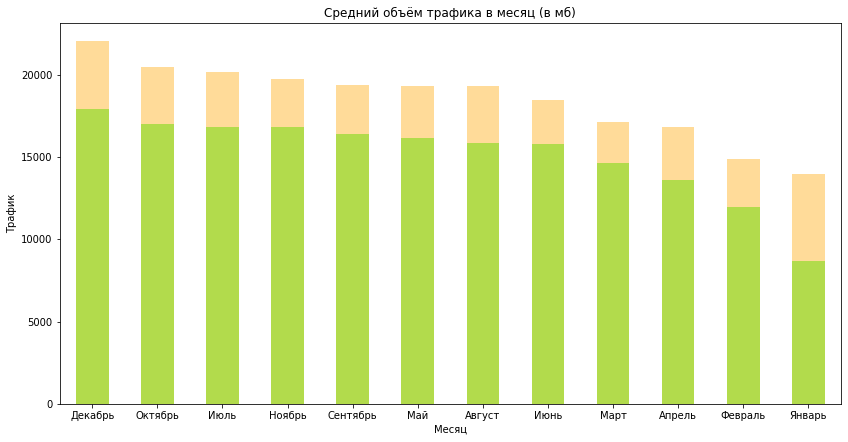

Средний объём трафика для тарифа "smart":  15149 мб 
Средний объём трафика для тарифа "ultra":  18494 мб 
Разница:  -3345 мб 

Дисперсия тарифа "smart":  33519504.41 
Дисперсия тарифа "ultra":  92816872.34 

Стандартное отклонение для тарифа "smart":  5789.60 
Стандартное отклонение для "ultra":  9634.15 
Разница:  39.91 %


In [30]:
# Создаю df в котором будет средний объём трафика для каждого месяца для тарифа "smart"
smart_data_internet = clear_user_data.query('tariff == "smart"').groupby(['tariff','month']).agg({'trafic_used':'mean'}).reset_index()

# Создаю df в котором будет средний объём трафика для каждого месяца для тарифа "ultra"
ultra_data_internet = clear_user_data.query('tariff == "ultra"').groupby(['tariff','month']).agg({'trafic_used':'mean'}).reset_index()

# Рисую график для тарифа "smart" - зелёный цвет
ax = (
    smart_data_internet
    .sort_values(by='trafic_used', ascending=False)
    .plot(y='trafic_used', x='month', kind='bar', title='Средний объём трафика в месяц (в мб)', figsize=(14, 7), alpha=0.5, color='lime', grid=True, legend=False)
)
# Рисую график для тарифа "ultra" - оранжевый цвет
(
    ultra_data_internet
    .sort_values(by='trafic_used', ascending=False)
    .plot(y='trafic_used', x='month', ax=ax, kind='bar', color='orange', alpha=0.4, legend=False)
)
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('Трафик')
plt.show() # рисую гистограмму

smart_mean = int(smart_data_internet['trafic_used'].mean()) # расчёт среднего объёма трафика для "smart"
ultra_mean = int(ultra_data_internet['trafic_used'].mean()) # расчёт среднего объёма трафика для "ultra"

# Подсчёт средних значений для каждого тарифа
print('Средний объём трафика для тарифа "smart":', ClrG, smart_mean, 'мб', ClrDef)
print('Средний объём трафика для тарифа "ultra":', ClrG, ultra_mean, 'мб', ClrDef)
print('Разница:', ClrG, smart_mean - ultra_mean, 'мб', ClrDef)
print()

# Расчёт дисперсии для тарифа "smart"
smart = clear_user_data.query('tariff == "smart"')['trafic_used'] # df с тарифом "smart"
smart_var = np.var(smart, ddof=1)  # расчёт дисперсии
print('Дисперсия тарифа "smart":', ClrG, '{:.2f}'.format(smart_var), ClrDef)

# Расчёт дисперсии для тарифа "ultra"
ultra = clear_user_data.query('tariff == "ultra"')['trafic_used'] # df с тарифом "ultra"
ultra_var = np.var(ultra, ddof=1) # расчёт дисперсии
print('Дисперсия тарифа "ultra":', ClrG, '{:.2f}'.format(ultra_var), ClrDef)
print('')

# Расчёт стандартного отклонения для тарифа "smart"
smart_std = np.std(smart, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для тарифа "smart":', ClrG, '{:.2f}'.format(smart_std), ClrDef)

# Расчёт стандартного отклонения для тарифа "ultra"
ultra_std = np.std(ultra, ddof=1) # расчёт стандартного отклонения
print('Стандартное отклонение для "ultra":', ClrG, '{:.2f}'.format(ultra_std), ClrDef)

print('Разница:', ClrG, '{:.2f}'.format(100 - (smart_std / ultra_std * 100)), '%')

Проанализировав полученные результаты, следует отметить следующие важные особенности:
* Объём интернет-трафика для тарифа __ultra__ в каждом месяце больше чем для тарифа __smart__
* Средний объём трафика для тарифа __ultra__ на __3.3 гб больше__ чем для тарифа __smart__
* Стандартное отклонения для тарифа __ultra__ почти на __40% больше__ чем для тарифа __smart__
* Больше всего интернет трафика для обоих тарифов было израсходовано в __декабре__, а меньше всего в __январе__ 

Данные показатели говорят о том, что пользователи с тарифом __ultra__ расходуют в среднем на __18% больше__ интернет-трафика, чем пользователи с тарифом __smart__.

### 3.4 Анализ показателя "Суммарная выручка по тарифному плану в месяц"
Для анализа данного показателя необходимо сформировать 2 новых датафрейма.

Первый - smart_revenue - он будет содержать информацию о клиентах пользующихся тарифным планом "smart".
Второй - ultra_revenue - он будет содержать информацию о клиентах пользующихся тарифным планом "ultra".
После чего рассчитаю сумарную выручку для каждого тарифного плана в месяц и полученные результаты визуализирую на столбчатой гистограмме, где тарифному плану __smart__ будет соответствовать __серый цвет__, а тарифному плану __ultra__ будет соответствовать __фиолетовый цвет__.

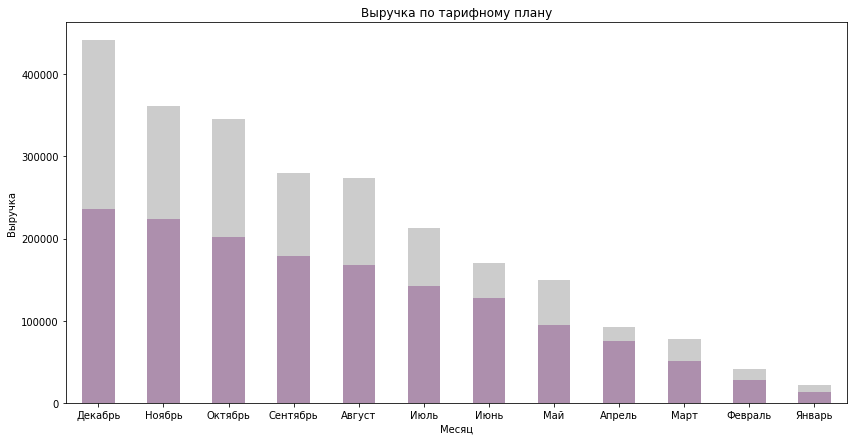

Средний объём ежемесячной выручки для тарифа "smart":  205662.50 рублей 
Средний объём ежемесячной выручки для тарифа "ultra":  128270.85 рублей 
Разница:  60.3 %


In [31]:
# Выручка по тарифному плану "Ultra"
ultra_revenue = clear_user_data.query('tariff =="ultra"').groupby(by='month').agg({'total_pay':'sum'}).reset_index()

# Выручка по тарифному плану "Smart"
smart_revenue = clear_user_data.query('tariff =="smart"').groupby(by='month').agg({'total_pay':'sum'}).reset_index()

# Рисую график для тарифа "ultra" - фиолетовый цвет
ax = (
    ultra_revenue
    .sort_values(by='total_pay', ascending=False)
    .plot(y='total_pay', x='month', kind='bar', title='Выручка по тарифному плану', figsize=(14, 7), alpha=0.4, color='purple', grid=True, legend=False)
)
# Рисую график для тарифа "smart" - серый цвет
(
    smart_revenue
    .sort_values(by='total_pay', ascending=False)
    .plot(y='total_pay', x='month', ax=ax, kind='bar', color='gray', alpha=0.4, legend=False)
)
plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show() # рисую гистограмму

# Подсчёт средних значений для каждого тарифа
print('Средний объём ежемесячной выручки для тарифа "smart":', ClrG, '{:.2f}'.format(smart_revenue['total_pay'].mean()), 'рублей', ClrDef)
print('Средний объём ежемесячной выручки для тарифа "ultra":', ClrG, '{:.2f}'.format(ultra_revenue['total_pay'].mean()), 'рублей', ClrDef)
print('Разница:', ClrG, '{:.1f}'.format((smart_revenue['total_pay'].mean() / ultra_revenue['total_pay'].mean() * 100) - 100), '%')

## Шаг 4. Проверка гипотез

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### 4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
Для проверки данной гипотезы, необходимо воспользоваться методом проверки гипотезы о равенстве средних двух генеральных совокупностей. Таким образом:
* __Нулевая гипотеза__ будет сформулирована следующим образом: средняя выручка пользователей тарифа __"Ультра"__ __равна__ средней выручке пользователей тарифа __"Смарт"__. 
* __Альтернативная гипотеза__ звучит следующим образом: средняя выручка пользователей тарифа __«Ультра»__ не равна средней выручке пользователей тарифа __«Смарт»__

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: __``scipy.stats.ttest_ind()``__.

In [32]:
# Создаю таблицу для тарифа "smart" где для каждого user_id будет посчитано средняя сумма расходов
array_smart = full_user_data.query('tariff == "smart"').groupby('user_id').agg({'total_pay':'mean'}).reset_index()

# Создаю таблицу для тарифа "ultra" где для каждого user_id будет посчитано средняя сумма расходов
array_ultra = full_user_data.query('tariff == "ultra"').groupby('user_id').agg({'total_pay':'mean'}).reset_index()

# Делаю выборку из 100 строк для проверки гипотезы
array_smart = array_smart[0:100]['total_pay'].tolist()
array_ultra = array_ultra[0:100]['total_pay'].tolist()

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
# Проверка нулевой гипотезы
results = st.ttest_ind(array_smart, array_ultra)

print('p-значение составляет:', ClrG, results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза Отвергнута!")
else:
    print("Нулевая гипотеза не отвергнута!")

p-значение составляет:  2.5142956317064405e-26
Нулевая гипотеза Отвергнута!


Полученное __p-значение__ крайне маленькое и это в свою очередь говорит о том, что средняя выручка пользователей тарифов __«Ультра»__ и __«Смарт»__ различается и она не равна. Таким образом нулевая гипотеза была __отвергнута__.

### 4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки данной гипотезы, необходимо воспользоваться методом гипотезы о равенстве средних двух генеральных совокупностей. Таким образом:

* __Нулевая гипотеза__ будет сформулирована следующим образом: средняя выручка пользователей из __Москвы__ __``равна``__ средней выручке пользователей из __других регионов__. 

* __Альтернативная гипотеза__ звучит следующим образом: средняя выручка пользователей из __Москвы__ __``не равна``__ средней выручке пользователей из __других регионов__.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуюсь методом: __``scipy.stats.ttest_ind()``__.

In [33]:
# Создаю таблицу для Москвы где для каждого user_id будет посчитано средняя сумма расходов
array_moskow = clear_user_data.query('city == "Москва"').groupby('user_id').agg({'total_pay':'mean'}).reset_index()

# Создаю таблицу для Регионов где для каждого user_id будет посчитано средняя сумма расходов
array_other_city = clear_user_data.query('city != "Москва"').groupby('user_id').agg({'total_pay':'mean'}).reset_index()

# Делаю выборку из 80 строк для проверки гипотезы
array_moskow = array_moskow[0:80]['total_pay'].tolist()
array_other_city = array_other_city[0:80]['total_pay'].tolist()

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
# Проверка нулевой гипотезы
results = st.ttest_ind(array_moskow, array_other_city)

print('p-значение составляет:', ClrG, results.pvalue)

if (results.pvalue < alpha):
    print("Нулевая гипотеза Отвергнута!")
else:
    print("Нулевая гипотеза не отвергнута!")

p-значение составляет:  0.9618996582810327
Нулевая гипотеза не отвергнута!


Полученное __p-значение__ довольно большое и это в свою очередь говорит о том, что средняя выручка пользователей из __Москвы__ и пользователей из __остальных регионов__ не различается и она равна. Таким образом нулевая гипотеза не может быть __отвергнута__.

## Шаг 5. Общий вывод

В ходе проведения комплексного анализа мной были проанализированы два тарифных плана телеком компании : __Смарт__ и __Ультра__. В ходе анализа были выявлены следующие интересные факторы:

1. Количество израсходованных минут, отправленных смс и объём интернет-трафика у тарифа __ultra__ в каждом месяце больше чем у тарифа __smart__.
2. Для тарифа __ultra__ характерны следующие особенности:
    * Количество израсходованных минут в месяц на __141 минуту__ или __26%__ __больше__ чем у тарифа __smart__.
    * Количество отправленных смс в месяц на __19 смс__ или __34% больше__ чем в тарифе __smart__. 
    * Объём используемого интернет-трафика в месяц на __18% больше__ чем для тарифа __smart__, разница составляет __3.3 гб__.
3. Больше всего минут, смс и интернет трафика было израсходовано в __Декабре__, наименьшее количество израсходованных минут и смс было в __Феврале__, а интернет трафика в __Январе__.

Так же в ходе анализа были проверены следующие гипотезы: 
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается:
    * Данная гипотеза не была отвергнута, так как удалось выяснить, что средняя выручка пользователей тарифов __«Ультра»__ и __«Смарт»__ различается и она __не равна__.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
    * Данная гипотеза была отвергнута, так как в ходе анализа удалось выяснить, что средняя выручка пользователей из __Москвы__ и пользователей из __остальных регионов__ не различается и она __примерно равна__.

Таким образом, резюмируя вышеизложенную информацию, можно сформулировать ответ на поставленный вопрос: __"Какой тарифный план лучше для телеком компании?"__. По-моему мнению, "лучшим" тарифом для телеком компании является тарифный план __Смарт__, так как пользователи данного тарифного плана расходуют меньше минут, смс и объёма интернет-трафика, но при этом в среднем они тратят на связь на __60 %__ больше, чем пользователи тарифа __Ультра__. Таким образом при продвижении тарифного плана __Смарт__ для телеком компании будет снижаться общий объём выделяемых ресурсов *(минут, смс, гб)*, что в свою очередь позволит значителько экономить на операционных издержках. То есть тариф __Смарт__ менее ресурсозатратный для компании, но при этом приносит больше ежемесячной прибыли чем тариф __Ультра__.